# Exploratory Data Analysis 

### Imporrt Libraries

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

### Missing Values

In [2]:
data= {'Name':['Ali','Abduallah','Sultan','Sami','Khalid','Amal','Maha','Razan','Amjad','Shahed'],
      'Gender':['Male','Male','Male','Male','Male','Female','Female','Female','Female','Female'],
      'Income':[5000, 7000, 3000, 7000, 3000, 5000, 7000, 3000, 7000, 1000]}

data = pd.DataFrame(data)

In [3]:
data

,Name,Gender,Income
0,Ali,Male,5000
1,Abduallah,Male,7000
2,Sultan,Male,3000
3,Sami,Male,7000
4,Khalid,Male,3000
5,Amal,Female,5000
6,Maha,Female,7000
7,Razan,Female,3000
8,Amjad,Female,7000
9,Shahed,Female,1000


In [4]:
condition = data["Gender"] == "Female"

female_data = data[condition]
female_data

,Name,Gender,Income
5,Amal,Female,5000
6,Maha,Female,7000
7,Razan,Female,3000
8,Amjad,Female,7000
9,Shahed,Female,1000


In [5]:
female_data.Income.mean()

4600.0

In [6]:
male_data = data[data["Gender"] == "Male"]

male_data.Income.mean()

5000.0

In [7]:
data = {'Name':['Ali','Abduallah','Sultan','Sami','Khalid','Amal','Maha','Razan','Amjad','Shahed'],
      'Gender':['Male','Male','Male','Male','Male','Female','Female','Female','Female','Female'],
      'Income':[5000, np.nan, 3000, 7000, np.nan, 5000, np.nan, np.nan, 7000, 1000]}

data = pd.DataFrame(data)

In [8]:
data

,Name,Gender,Income
0,Ali,Male,5000.0
1,Abduallah,Male,NaN
2,Sultan,Male,3000.0
3,Sami,Male,7000.0
4,Khalid,Male,NaN
5,Amal,Female,5000.0
6,Maha,Female,NaN
7,Razan,Female,NaN
8,Amjad,Female,7000.0
9,Shahed,Female,1000.0


In [9]:
female_data = data[data["Gender"] == "Female"]
male_data = data[data["Gender"] == "Male"]
print('Male Avg. Income',male_data.Income.mean())
print('Female Avg. Income', round(female_data.Income.mean()))

Male Avg. Income 5000.0
Female Avg. Income 4333


In [10]:
data = {'Name':['Ali','Abduallah','Sultan','Sami','Khalid','Amal','Maha','Razan','Amjad','Shahed'],
      'Gender':['Male','Male','Male','Male','Male','Female','Female','Female','Female','Female'],
      'Income':[5000, np.nan, 3000, 7000, np.nan, 5000, np.nan, np.nan, 7000, 1000],
       'Work':['On_site','Remote','On_site','On_site','Remote','On_site','Remote','Remote','On_site','On_site']}

data = pd.DataFrame(data)
data

,Name,Gender,Income,Work
0,Ali,Male,5000.0,On_site
1,Abduallah,Male,NaN,Remote
2,Sultan,Male,3000.0,On_site
3,Sami,Male,7000.0,On_site
4,Khalid,Male,NaN,Remote
5,Amal,Female,5000.0,On_site
6,Maha,Female,NaN,Remote
7,Razan,Female,NaN,Remote
8,Amjad,Female,7000.0,On_site
9,Shahed,Female,1000.0,On_site


In [11]:
data = {'Name':['Ali','Abduallah',np.nan,'Sami',np.nan,'Amal',np.nan,np.nan,'Amjad','Shahed'],
      'Gender':['Male','Male','Male','Male','Male','Female','Female','Female','Female',np.nan],
      'Income':[5000, 7000, np.nan, 7000, 3000, np.nan, 7000, 3000, 7000, 1000],
       'Work':[np.nan,'Remote',np.nan,'On_site','Remote','On_site','Remote',np.nan,0,0]}

data = pd.DataFrame(data)
data

,Name,Gender,Income,Work
0,Ali,Male,5000.0,NaN
1,Abduallah,Male,7000.0,Remote
2,NaN,Male,NaN,NaN
3,Sami,Male,7000.0,On_site
4,NaN,Male,3000.0,Remote
5,Amal,Female,NaN,On_site
6,NaN,Female,7000.0,Remote
7,NaN,Female,3000.0,NaN
8,Amjad,Female,7000.0,0
9,Shahed,NaN,1000.0,0


### Imputation

In [12]:
grades = pd.read_csv('class-grades.csv', header=0, sep=",", error_bad_lines=False)
grades

b'Skipping line 22: expected 6 fields, saw 7\nSkipping line 40: expected 6 fields, saw 7\nSkipping line 62: expected 6 fields, saw 7\n'


,Prefix,Assignment,Tutorial,Midterm,TakeHome,Final
0,5,57.14,34.09,64.38,51.48,52.50
1,8,95.05,105.49,67.50,99.07,68.33
2,8,83.70,83.17,30.00,63.15,48.89
3,7,81.22,96.06,49.38,105.93,80.56
4,8,91.32,93.64,95.00,107.41,73.89
...,...,...,...,...,...,...
91,8,96.73,103.71,45.00,93.52,61.94
92,7,85.34,80.54,41.25,93.70,39.72
93,8,89.94,102.77,87.50,90.74,87.78
94,7,95.60,76.13,66.25,99.81,85.56


In [13]:
grades.isnull().sum()

Prefix        0
Assignment    0
Tutorial      0
Midterm       0
TakeHome      1
Final         0
dtype: int64

In [14]:
for col in grades.columns:
    grades.loc[grades.sample(frac=0.1).index, col] = pd.np.nan

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  


In [15]:
grades.isnull().sum()

Prefix        10
Assignment    10
Tutorial      10
Midterm       10
TakeHome      11
Final         10
dtype: int64

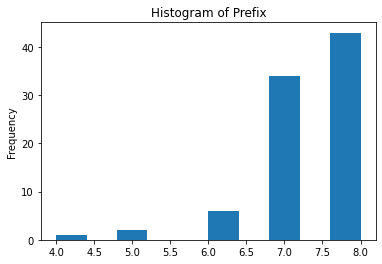

In [16]:
grades['Prefix'].plot(kind="hist", title="Histogram of Prefix");

In [17]:
grades['Prefix'].var()

0.6533515731874154

In [18]:
prefix_mean = round(grades['Prefix'].mean())
prefix_mean

7

In [19]:
grades['Prefix'] = grades['Prefix'].fillna(prefix_mean)
grades['Prefix'].isnull().sum()

0

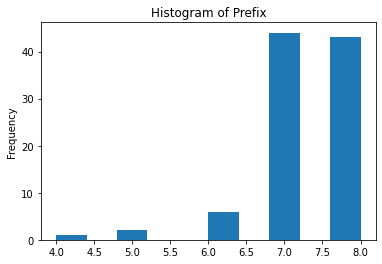

In [20]:
grades['Prefix'].plot(kind="hist", title="Histogram of Prefix");

In [21]:
grades['Prefix'].var()

0.5960526315789474

In [22]:
grades.isnull().sum()

Prefix         0
Assignment    10
Tutorial      10
Midterm       10
TakeHome      11
Final         10
dtype: int64

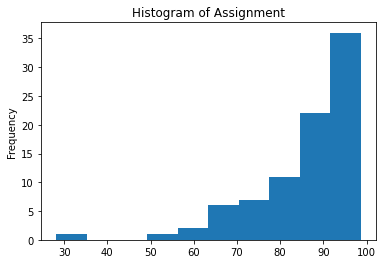

In [23]:
grades['Assignment'].plot(kind="hist", title="Histogram of Assignment");

In [24]:
grades['Assignment'].var()

152.66969922024612

In [25]:
assignment_median = round(grades['Assignment'].median())
assignment_median

90

In [26]:
grades['Assignment'] = grades['Assignment'].fillna(assignment_median)
grades['Assignment'].isnull().sum()

0

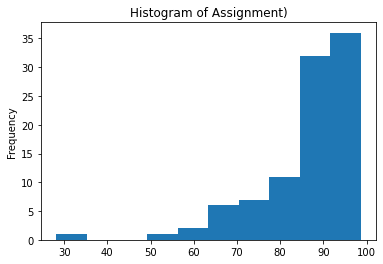

In [27]:
grades['Assignment'].plot(kind="hist",title="Histogram of Assignment)");

In [28]:
grades['Assignment'].var()

138.13361077850882

In [29]:
round(grades['Assignment'].median())

90

### Forward Filling 

In [30]:
grades.isnull().sum()

Prefix         0
Assignment     0
Tutorial      10
Midterm       10
TakeHome      11
Final         10
dtype: int64

In [31]:
grades['Tutorial'] = grades['Tutorial'].fillna(method="ffill")

In [32]:
grades.isnull().sum()

Prefix         0
Assignment     0
Tutorial       0
Midterm       10
TakeHome      11
Final         10
dtype: int64

In [33]:
grades['Tutorial']

0      34.09
1     105.49
2      83.17
3      96.06
4      96.06
       ...  
91    103.71
92     80.54
93     80.54
94     76.13
95     97.37
Name: Tutorial, Length: 96, dtype: float64

In [34]:
grades['TakeHome']

0      51.48
1        NaN
2      63.15
3     105.93
4     107.41
       ...  
91     93.52
92     93.70
93       NaN
94     99.81
95     72.78
Name: TakeHome, Length: 96, dtype: float64

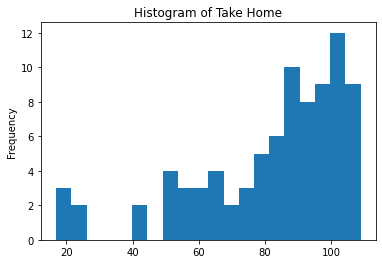

In [35]:
grades['TakeHome'].plot(kind="hist", bins=20, title="Histogram of Take Home");

In [36]:
grades['TakeHome'].fillna(method="ffill", inplace =True)

In [37]:
grades.isnull().sum()

Prefix         0
Assignment     0
Tutorial       0
Midterm       10
TakeHome       0
Final         10
dtype: int64

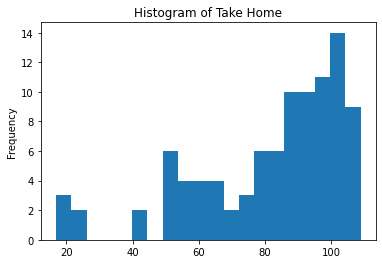

In [38]:
grades['TakeHome'].plot(kind="hist", bins=20, title="Histogram of Take Home");

### Backward Filling

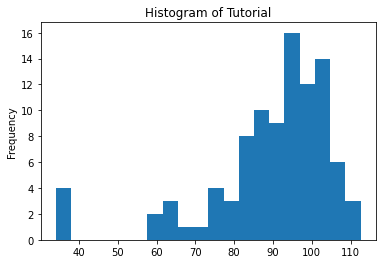

In [39]:
grades['Tutorial'].plot(kind="hist", bins=20, title="Histogram of Tutorial");

In [40]:
grades['Tutorial'].fillna(method="bfill", inplace =True)

In [41]:
grades.isnull().sum()

Prefix         0
Assignment     0
Tutorial       0
Midterm       10
TakeHome       0
Final         10
dtype: int64

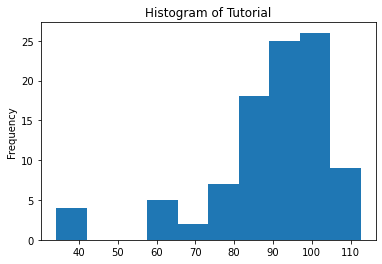

In [42]:
grades['Tutorial'].plot(kind="hist", title="Histogram of Tutorial");

### Drop Null Values

In [43]:
grades.isnull().sum()

Prefix         0
Assignment     0
Tutorial       0
Midterm       10
TakeHome       0
Final         10
dtype: int64

In [44]:
grades.dropna(axis = 'index', how = 'any', subset = ['Midterm'], inplace=True)

In [45]:
grades.isnull().sum()

Prefix         0
Assignment     0
Tutorial       0
Midterm        0
TakeHome       0
Final         10
dtype: int64